# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on March 1st at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 1)_

<b>Asger Laurits Schultz</b>

<b>August Semrau Andersen</b>

<b>Andreas Hornemann Nielsen</b>

# Part 1: Datasets for Computational Social Science

> This year, lockdowns have helped governments contain the pandemic. But they also negatively impacted our wellbeing. Imagine you had to study the following question: "_What are some of the strategies people adopt to preserve their mental and physical wellbeing during lockdown?_"
> * Write in a couple of lines: 
>> * Which data would you collect to study this topic?

Get data from YouTube about what people have watched more than usual, e.g. home cooking. This could also including looking at subscriber numbers for fitness channels, cooking channels, etc. Search data from Google would also provide valuable data about people's behavior.

Surverys would also provide a valueable insight into people's behavior.

>> * How would you collect it?

Both YouTube and Google have public API's, making it easy to get a lot of data.

A survey would have to be constructed and shared to as many people as possible.

> * Describe the data you would need more in details (also by writing down a couple of lines): 
>> * How big is the data (number of users/number of data points)? 

Both have billions of users, however the data collected would be in aggregated form rather than by user. The number of data points would thus be limited to search terms, tags, and videos, which in total would maybe number in a number of thousands. Comments on said videos could also be extracted, which would likely be millions.

Survey data could number from a few hundred responses to millions if advertised well.

>> * Which variables it contains? 

YouTube video data would mainly contain views, likes/dislikes, viewing times, and changes in these during lockdown. Comments, if extracted, would be word sequences that could be analyzed using sentiment analysis. Google Trends offers the relative popularity of search terms over time. The data also given by country, which would allow analyzing the popularity of strategies in different places.

> * Write down three limitations of the data you have collected. 

- No individual data for the non-survey data. Aggregate data is the sum of many users' data, making it have much less information than individual data, and it can often conceal interesting patterns.
- Data could not be expected to be representative. It would likely skew young, as that many old people do not use the internet. Especially a survey would risk being answered by many similar people, e.g. if shared within friend groups.
- Non-survey data would be dirty and would likely need a lot of cleaning. Especially if data from different sources are combined.


# Part 2: r/wallstreetbets authors lifespan
> Consider the _comments dataset_ including comments posted on r/wallstreetbets in reply to submissions about Gamestop. 
> 1. For each author, find the time of publication of their first comment, _min_time_, and the time of publication of their last comment, _max_time_, in [unix timestamp](https://www.unixtimestamp.com/). 
> 2. Compute the "lifespan" of authors as the difference between _max_time_ and _min_time_. Note that timestamps are measured in seconds, but it is appropriate here to compute the lifespan in days. Make a histogram showing the distribution of lifespans, choosing appropriate binning. What do you observe?
> 3. Now, we will look at how many authors joined and abandoned the discussion on GME over time. First, use the numpy function [numpy.histogram2d](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html) to create a 2-dimensional histogram for the two variables _min_time_ and _max_time_. A 2D histogram, is nothing but a histogram where bins have two dimensions, as we look simultaneously at two variables. You need to specify two arrays of bins, one for the x-axis and the other for the y-axis. Pick bins with length 1 week.
> 4. Now, use the matplotlib function [``plt.imshow``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to visualize the 2d histogram. You can follow [this example](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) on StackOverflow. To show dates instead of unix timestamps in the x and y axes, use [``mdates.date2num``](https://matplotlib.org/api/dates_api.html#matplotlib.dates.date2num). More details in this [StackOverflow example](https://stackoverflow.com/questions/23139595/dates-in-the-xaxis-for-a-matplotlib-plot-with-imshow), see accepted answer.
> 5. Make sure that the colormap allows to well interpret the data, by passing ``norm=mpl.colors.LogNorm()`` as an argument to imshow. This will ensure that your colormap is log-scaled. Add a [colorbar](https://matplotlib.org/3.1.0/gallery/color/colorbar_basics.html) on the side of the figure, with the appropriate [colorbar label](https://matplotlib.org/3.1.1/api/colorbar_api.html#matplotlib.colorbar.ColorbarBase.set_label).
> 6. Look at the figure, and write down three key observations.

### Find first comment, *min_time*, and last comment *max_time* and compute linespan of authors

In [1]:
from __future__ import annotations
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
plt.style.use('dark_background')

df = pd.read_pickle(r"comments.pkl")
unix_created = (df["created_utc"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df.drop(['created_utc'], axis=1)
df['unix_created'] = unix_created

In [2]:
maximums = df.groupby("author")['unix_created'].max()
maximums = maximums.reset_index()
maximums.rename(columns = {'unix_created': 'max_time'}, inplace = True)

In [3]:
minimums = df.groupby("author")['unix_created'].min()
minimums = minimums.reset_index()
minimums.rename(columns = {'unix_created':'min_time'}, inplace = True)

In [4]:
lifespan = (maximums.loc[:, 'max_time'] - minimums.loc[:, 'min_time']) // 86400

In [5]:
data = { 'authoer': df.author, 'lifespan': lifespan, 'max_time': maximums.loc[:, 'max_time'], 'min_time': minimums.loc[:, 'min_time'] }
df_times = pd.DataFrame(data=data)
df_times = df_times.dropna()

a = df_times['max_time'].max()
b = df_times['min_time'].min()
df_times

,authoer,lifespan,max_time,min_time
0,Abruzzi19,13.0,1.603376e+09,1.602188e+09
1,Theta_Gang_and_Chill,0.0,1.611327e+09,1.611262e+09
2,Abruzzi19,0.0,1.609097e+09,1.609017e+09
3,Rick_C-69,228.0,1.610403e+09,1.590678e+09
4,[deleted],0.0,1.609524e+09,1.609524e+09
...,...,...,...,...
75668,propiedadporfavor,21.0,1.611161e+09,1.609274e+09
75669,eldeeequince,0.0,1.611973e+09,1.611973e+09
75670,gumsgotmintierlately,0.0,1.611282e+09,1.611282e+09
75671,djainsjdj,0.0,1.611248e+09,1.611248e+09


As can be see in the above DataFrame we find both the max_time, min_time and also the lifespan of the authors in days.

### Plot a histogram showing the distribution of lifespans

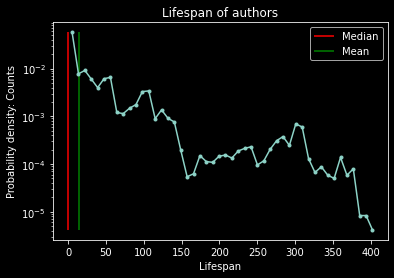

In [6]:
bins = np.linspace(1, lifespan.max()+10, 50)
hist, edges = np.histogram(lifespan, bins, density = True)
x = (edges[1:] + edges[:-1]) / 2
xx, yy = x[hist>0], hist[hist>0]
fig, ax = plt.subplots()
ax.plot(xx,yy,marker=".")
ax.vlines(np.median(lifespan), yy.min(), yy.max(), color= ["r"], label = "Median")
ax.vlines(np.mean(lifespan), yy.min(), yy.max(), color= ["g"], label = "Mean")
ax.set_title("Lifespan of authors")
ax.set_yscale("log")
ax.set_xlabel("Lifespan")
ax.set_ylabel("Probability density: Counts")
ax.legend()

Above there is a histogram can be seen for the lifespan, put into 50 bins so showcase. It shows that most authors have a short lifespan within the timespan of the data. This is likely a lot of new redditors joining when Gamestop stock rose.

### Compute the 2dHistogram for max/min - time and visualization using dates

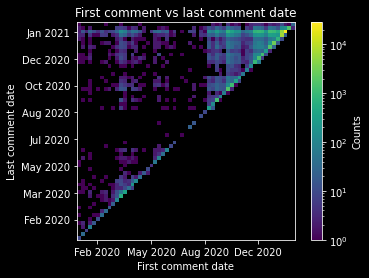

In [7]:
fmt = mdates.DateFormatter("%b %Y")
starts = df_times['min_time']
stops = df_times['max_time']
hist, xe, ye = np.histogram2d(starts, stops, bins=57)
hist = hist.T
xlims = [dt.datetime.fromtimestamp(x) for x in [xe[0], xe[-1]]]
xlims = mdates.date2num(xlims)
ylims = [dt.datetime.fromtimestamp(y) for y in [ye[0], ye[-1]]]
ylims = mdates.date2num(ylims)
fig, ax = plt.subplots()
pos = ax.imshow(hist, extent=[xlims[0], xlims[1], ylims[0], ylims[1]], origin="lower", norm=mpl.colors.LogNorm())
ax.xaxis.set_major_formatter(fmt)
ax.yaxis.set_major_formatter(fmt)
ax.set_title("First comment vs last comment date")
ax.set_xlabel("First comment date")
ax.set_ylabel("Last comment date")
bar = fig.colorbar(pos)
bar.set_label("Counts")

Observations

As expected there are no comments before the first comment. Otherwise the data would clearly have errors.

The plot also shows a hugely increased activity when reaching Dec 2020 / Jan 2021 where the GME posts exploded.

Early on there are many days with no authors with a first and last comment. This is likely due to the relatively few users from that time being quite active.

The horizontal line on the top shows that both older and newer users increased had high activity in january.

#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then
>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.
>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).
>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

### Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.

Icons a, c, and d can be written without lifting the pencil and without drawing any line more than once.

Use that any such graph with that property must have at most two nodes with an uneven number of edges. Then observe the number of nodes with an uneven number of edges on each figure: a has two, b has four, c has zero, and d has two. Only b has more than two such nodes, making it the only icon that cannot be written without lifting the pencil and without drawing a line more than once.

In this relatively simple case, it is also easy for all icons except b to construct an example path that can be drawn without lifting and drawing the line more than once.

### Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).

In [8]:
import networkx as nx
import numpy as np

In [9]:
ug = nx.Graph()
dg = nx.DiGraph()
ug.add_nodes_from(range(1, 7))
dg.add_nodes_from(range(1, 7))
ug.add_edges_from((
    [1, 2],
    [1, 3],
    [1, 4],
    [1, 6],
    [2, 3],
    [2, 4],
    [3, 6],
))
dg.add_edges_from((
    [1, 2],
    [2, 3],
    [2, 4],
    [3, 1],
    [3, 2],
    [4, 1],
    [6, 1],
    [6, 3],
))
print_ug = lambda *x: print("Undirected graph", *x, sep="\n")
print_dg = lambda *x: print("Directed graph", *x, sep="\n")

In [10]:
# The corresponding adjacency matrices.
print("Adjacency matrices")
ug_am = nx.adjacency_matrix(ug).todense()
print_ug(ug_am)
dg_am = nx.adjacency_matrix(dg).todense()
print_dg(dg_am)

Adjacency matrices
Undirected graph
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
Directed graph
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [11]:
# The corresponding link lists.
print("\nLink lists")
print_ug(np.array(ug.edges))
print_dg(np.array(dg.edges))


Link lists
Undirected graph
[[1 2]
 [1 3]
 [1 4]
 [1 6]
 [2 3]
 [2 4]
 [3 6]]
Directed graph
[[1 2]
 [2 3]
 [2 4]
 [3 1]
 [3 2]
 [4 1]
 [6 1]
 [6 3]]


In [12]:
# Determine the average clustering coefficient of the network shown in Image 2.20a
print("\nAverage clustering coefficient")
print_ug("C = %.4f" % nx.average_clustering(ug))


Average clustering coefficient
Undirected graph
C = 0.6389


> If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?

If the labels of nodes 5 and 6 are switched, it would mean switching row 5 and 6 and column 5 and 6 in the adjacency matrix. In the link list, it would mean switching all instances of 5 and 6:

```
0 1 1 1 1 0
1 0 1 1 0 0
1 1 0 0 1 0
1 1 0 0 0 0
1 0 1 0 0 0
0 0 0 0 0 0

1 2
1 3
1 4
1 5
2 3
2 4
3 5
```

> What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

For unweighted graphs, the two representations are eqiuvalent, so both contain exactly the same information, but some things are calculated quicker with one representation than the other.

In weighted graphs, the weights are lost in the link list, unless it is expanded to an $L\times 3$ matrix, where the third column contains the weights.

The adjency matrix also makes it possible to quickly check if an edge is reversible by checking the same position in the transposed matrix - either by it being undirected, or by there by an opposite directed edge. While this is also possible in the linked list, it would require checking potentially up to every single edge in the graph.

In [13]:
# In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

start = 1
goal = 3
length = 3

def all_paths(graph) -> list[list]:
    paths = [[start]]
    for i in range(length):
        new_paths = list()
        for path in paths:
            for neigh in graph.adj[path[-1]]:
                new_paths.append(path + [neigh])
        paths = new_paths
    return [path for path in paths if path[-1] == goal]

ug_paths = all_paths(ug)
print_ug("Number of paths: %i" % len(ug_paths), *ug_paths)
dg_paths = all_paths(dg)

print()
print_dg("Number of paths: %i" % len(dg_paths), *dg_paths)

Undirected graph
Number of paths: 7
[1, 2, 1, 3]
[1, 3, 1, 3]
[1, 3, 2, 3]
[1, 3, 6, 3]
[1, 4, 1, 3]
[1, 4, 2, 3]
[1, 6, 1, 3]

Directed graph
Number of paths: 0


### Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

In [14]:
g = nx.Graph()
g.add_nodes_from(range(1, 12))
g.add_edges_from((
    [1, 7],
    [2, 9],
    [3, 7],
    [3, 8],
    [3, 9],
    [4, 9],
    [4, 10],
    [5, 9],
    [5, 11],
    [6, 11],
))

In [15]:
# Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.
purple = nx.projected_graph(g, range(1, 7))
purple_adj = nx.adjacency_matrix(purple).todense()
print("\nPurple adjecency matrix")
print(purple_adj)
green = nx.projected_graph(g, range(7, 12))
green_adj = nx.adjacency_matrix(green).todense()
print("\nGreen adjecency matrix")
print(green_adj)


Purple adjecency matrix
[[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]

Green adjecency matrix
[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [16]:
# Construct its adjacency matrix. Why is it a block-diagonal matrix?
print("Adjacency matrix")
adj = nx.adjacency_matrix(g).todense()
print(adj)

Adjacency matrix
[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


In [17]:
# Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.
purple_avg_deg = adj[:6].sum(axis=1).mean()
green_avg_dev  = adj[6:].sum(axis=1).mean()
print("\nPurple average degree = %.4f" % purple_avg_deg)
print("Green average degree  = %.4f" % green_avg_dev)


Purple average degree = 1.6667
Green average degree  = 2.0000


In [18]:
# Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?
p_avg_deg = purple_adj.sum(axis=1).mean()
g_avg_deg = green_adj.sum(axis=1).mean()
print("\nAverage degree in purple projection = %.4f" % p_avg_deg)
print("Average degree in green projection  = %.4f" % g_avg_deg)
# It is not surprising that there are different values, as the number of degrees for each node in the projections are dependent on the neighbours in the full graph


Average degree in purple projection = 2.6667
Average degree in green projection  = 2.0000


# Part 4: Preliminary analysis of the GME redditors network

> Consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).
> * Why do you think I want you guys to use a _directed_ graph? Could have we used an undirected graph instead?
> * What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?
> * What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?
> * List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?
> * Plot the distribution of in-degrees and out-degrees, using a logarithmic binning. 
> * Plot a scatter plot of the the in- versus out- degree for all redditors. Comment on the relation between the two.
> * Plot a scatter plot of the the in- degree versus average score for all redditors. Comment on the relation between the two.


In [19]:
"""
Imports for Part 4
"""
import pandas as pd
import numpy as np
import networkx as nx
from scipy import stats 
from operator import itemgetter 
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def setup_mpl():
    #mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 200
    #mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

In [20]:
"""
This cell and the one below load the data from .pkl file, finds the parent_authors and creates the network using networkX in accordance to week 3 exercises.
The remaining cells answer the given questions.
"""

# Load data
wsb_comments = pd.read_pickle('comments.pkl')
wsb_submissions = pd.read_pickle('posts.pkl')

# Create dictionaries
parent = dict(zip(wsb_comments['id'], wsb_comments['parent_id']))
comment_authors = dict(zip(wsb_comments['id'], wsb_comments['author']))
submission_authors = dict(zip(wsb_submissions['id'], wsb_submissions['author']))

# Define function for getting parent author
def parent_author(comment_id):
    parent_id = parent[comment_id]

    try:
        if parent_id[:3] == 't1_':
            return comment_authors[parent_id[3:]]
        else:
            return submission_authors[parent_id[3:]]
    except:
        pass

# Add empty column to comments dataframe
wsb_comments['parent_author'] = ""

# For every comment id to add the parent_author
wsb_comments['parent_author'] = wsb_comments.id.apply(parent_author)

# Filter dataframe, only keepinbg posts before Dec 31st, 2020 with actual parent_author names
wsb_comments_filtered = wsb_comments.loc[wsb_comments['created_utc'] <= '2020-12-31']
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['author'] != '[deleted]']
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['author'].notnull()]
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['parent_author'] != '[deleted]']
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['parent_author'].notnull()]

# Create weighted edge list
edge_list = wsb_comments_filtered.groupby(['author', 'parent_author']).size().to_frame('weight').reset_index()

# Define nodes and weights
sources = list(edge_list['author'])
targets = list(edge_list['parent_author'])
weights = list(edge_list['weight'])

# Create tuple list of edges with weights
edges = [(sources[i], targets[i], weights[i]) for i in range(len(sources))]

# Create graph and add nodes and edges
wsb_graph = nx.DiGraph()
wsb_graph.add_nodes_from(sources)
wsb_graph.add_nodes_from(targets)
wsb_graph.add_weighted_edges_from(edges)


### Question: Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?

Answer: Using an undirected graph would omit information essential to understanding the Redditors Network, namely the direction of the interaction, as these are *NOT* bi-directional. 
Lets say that redditor A creates a submission that recieves 10 comments, and redditor B leaves one comments at 10 different posts. Redditor A and B would look identical in an udirected graph, one node with 10 edges, but it is obvious that their roles on Reddit are different, and we need the directed graph to maintain this peice of information.

In [21]:
### What is the total number of nodes in the network? What is the total number of links? What is the density of the network (the total number of links over the maximum number of links)?

wsb_num_nodes = wsb_graph.number_of_nodes()
wsb_num_links = wsb_graph.number_of_edges()
wsb_density = nx.classes.function.density(wsb_graph)

print("The number of nodes in the author-parent_author graph: ", wsb_num_nodes)
print("The number of links in the author-parent_author graph: ", wsb_num_links)
print("The density of the author-parent_author graph: ", wsb_density)


The number of nodes in the author-parent_author graph:  27593
The number of links in the author-parent_author graph:  92642
The density of the author-parent_author graph:  0.00012168185448641767


In [22]:
### What are the average, median, mode, minimum and maximum value of the in-degree (number of incoming edges per redditor)? And of the out-degree (number of outgoing edges per redditor)? How do you intepret the results?

wsb_in_degrees_dict = dict(wsb_graph.in_degree())
wsb_out_degrees_dict = dict(wsb_graph.out_degree())

wsb_in_degrees = list(wsb_in_degrees_dict.values())
wsb_out_degrees = list(wsb_out_degrees_dict.values())


print("In-degree of redditors in the graph: ")
print("  Average:", np.mean(wsb_in_degrees))
print("  Median: ", np.median(wsb_in_degrees))
print("  Mode:    {0} with {1} occurences.".format(int(stats.mode(wsb_in_degrees)[0]), int(stats.mode(wsb_in_degrees)[1])))
print("  Minimum:", min(wsb_in_degrees))
print("  Maximum:", max(wsb_in_degrees))
print("")

print("Out-degree of redditors in the graph: ")
print("  Average:", np.mean(wsb_out_degrees))
print("  Median: ", np.median(wsb_out_degrees))
print("  Mode:    {0} with {1} occurences.".format(int(stats.mode(wsb_out_degrees)[0]), int(stats.mode(wsb_out_degrees)[1])))
print("  Minimum:", min(wsb_out_degrees))
print("  Maximum:", max(wsb_out_degrees))



In-degree of redditors in the graph: 
  Average: 3.3574457289892363
  Median:  1.0
  Mode:    0 with 12920 occurences.
  Minimum: 0
  Maximum: 2506

Out-degree of redditors in the graph: 
  Average: 3.3574457289892363
  Median:  1.0
  Mode:    1 with 15829 occurences.
  Minimum: 0
  Maximum: 912


In [23]:
### List the top 5 Redditors by in-degree and out-degree. What is their average score over time? At which point in time did they join the discussion on GME? When did they leave it?

N = 5
wsb_top5_in = dict(sorted(wsb_in_degrees_dict.items(), key = itemgetter(1), reverse = True)[:N])
wsb_top5_out = dict(sorted(wsb_out_degrees_dict.items(), key = itemgetter(1), reverse = True)[:N])
print("Top 5 redditors by in-degree:\n", wsb_top5_in)
print("Top 5 redditors by out-degree:\n", wsb_top5_out)
print("")

for author in wsb_top5_in:
    author_submissions = wsb_submissions.loc[wsb_submissions['author'] == author]
    author_comments = wsb_comments.loc[wsb_comments['author'] == author]
    author_entries = pd.concat([author_submissions, author_comments], axis=0, ignore_index=True)
    first_entry = min(author_entries['created_utc'])
    latest_entry = max(author_entries['created_utc'])
    print("Author: '{0}' \n Joined the GME discussion on {1}. \n Last activity on             {2}.".format(author, first_entry, latest_entry))
print("")


for author in wsb_top5_out:
    author_submissions = wsb_submissions.loc[wsb_submissions['author'] == author]
    author_comments = wsb_comments.loc[wsb_comments['author'] == author]
    author_entries = pd.concat([author_submissions, author_comments], axis=0, ignore_index=True)
    first_entry = min(author_entries['created_utc'])
    latest_entry = max(author_entries['created_utc'])
    print("Author: '{0}' \n Joined the GME discussion on {1}. \n Last activity on             {2}.".format(author, first_entry, latest_entry))
print("")




Top 5 redditors by in-degree:
 {'DeepFuckingValue': 2506, 'OPINION_IS_UNPOPULAR': 1492, 'rapsfan1515': 1267, 'horny131313': 914, 'SIR_JACK_A_LOT': 833}
Top 5 redditors by out-degree:
 {'WSBVoteBot': 912, 'Ackilles': 466, 'AutoModerator': 444, 'sneakersourcerer': 440, 'Stonksflyingup': 399}

Author: 'DeepFuckingValue' 
 Joined the GME discussion on 2020-01-01 02:13:28. 
 Last activity on             2021-01-22 21:14:08.
Author: 'OPINION_IS_UNPOPULAR' 
 Joined the GME discussion on 2020-06-05 06:44:41. 
 Last activity on             2021-01-22 21:21:21.
Author: 'rapsfan1515' 
 Joined the GME discussion on 2020-10-10 14:46:50. 
 Last activity on             2020-10-12 15:01:50.
Author: 'horny131313' 
 Joined the GME discussion on 2020-11-28 05:02:14. 
 Last activity on             2021-02-08 15:46:08.
Author: 'SIR_JACK_A_LOT' 
 Joined the GME discussion on 2020-11-20 20:40:57. 
 Last activity on             2021-02-02 23:39:56.

Author: 'WSBVoteBot' 
 Joined the GME discussion on 2020-04-

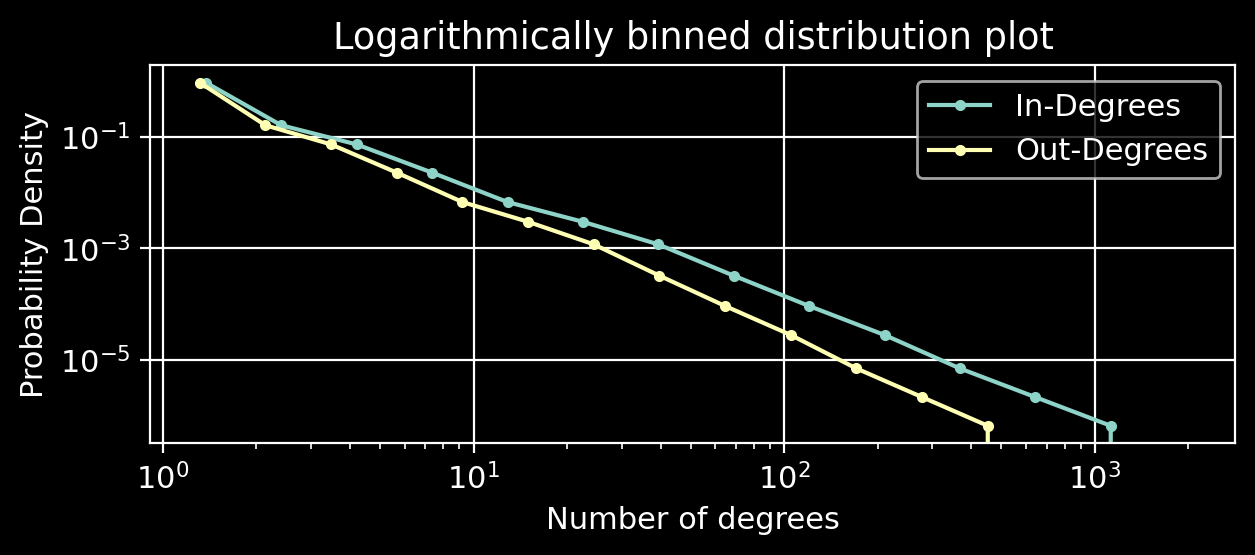

In [24]:
### Plot the distribution of in-degrees and out-degrees, using a logarithmic binning (see last week's exercise 4).

# Compute histogram
bins = np.logspace(np.log10(1), np.log10(max(wsb_in_degrees)), 15)
hist, edges = np.histogram(wsb_in_degrees, bins=bins, density=True)
x_in = (edges[1:] + edges[:-1]) / 2.

bins = np.logspace(np.log10(1), np.log10(max(wsb_out_degrees)), 15)
hist, edges = np.histogram(wsb_out_degrees, bins=bins, density=True)
x_out = (edges[1:] + edges[:-1]) / 2.

# Both in and out-degrees plot
fig, ax = plt.subplots()
ax.plot(x_in, hist, marker='.', label='In-Degrees')
ax.plot(x_out, hist, marker='.', label='Out-Degrees')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of degrees')
ax.set_ylabel('Probability Density')
ax.set_title("Logarithmically binned distribution plot")
ax.grid()
ax.legend(loc='upper right')


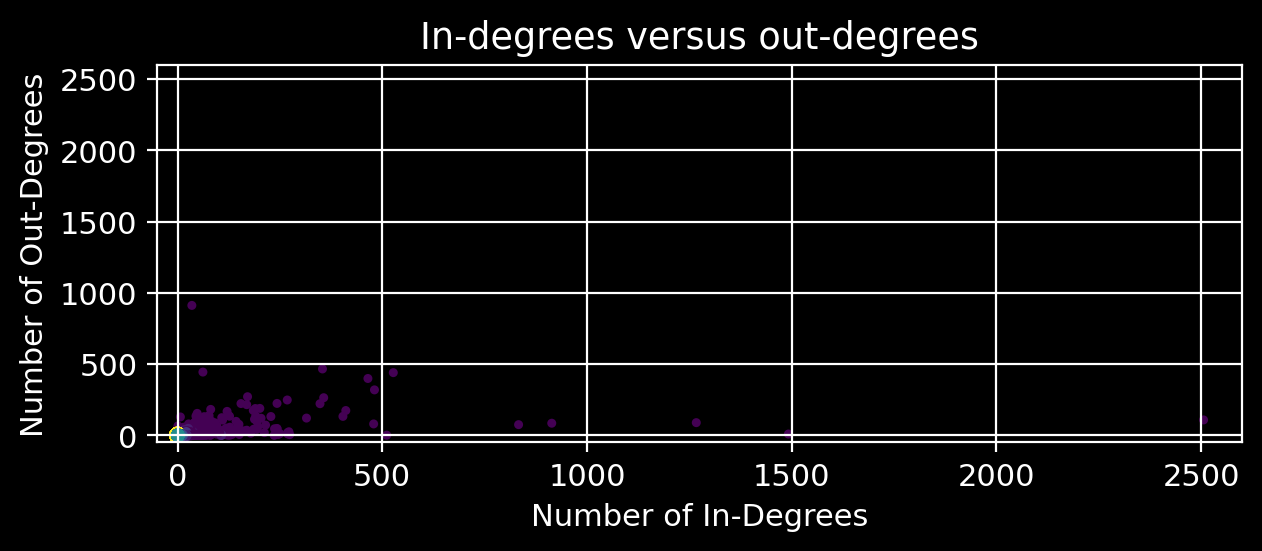

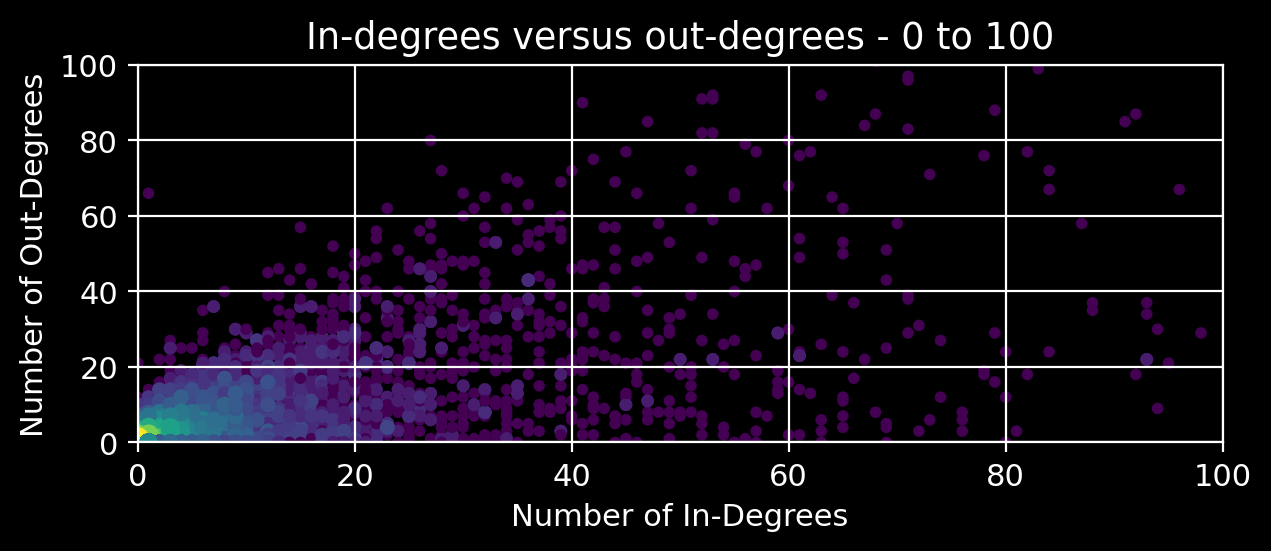

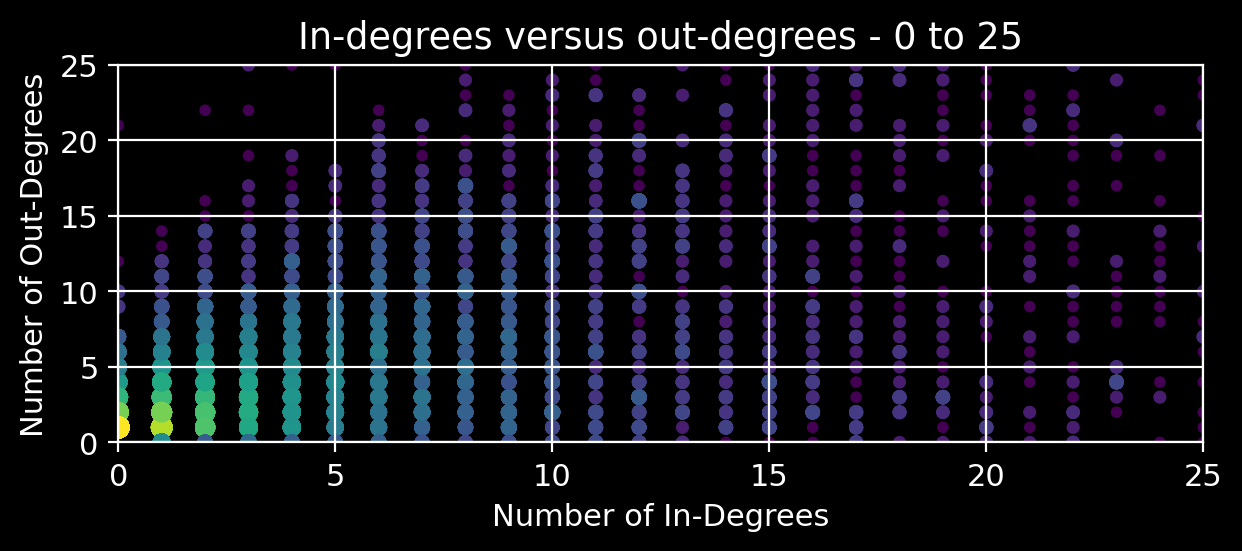

In [25]:
### Plot a scatter plot of the the in- versus out- degree for all redditors. 

# Define scatter plot dot sizes
c = Counter(zip(wsb_in_degrees, wsb_out_degrees))
sizes = [10*c[(xx,yy)] for xx,yy in zip(wsb_in_degrees, wsb_out_degrees)]


fig, ax = plt.subplots()
ax.scatter(wsb_in_degrees, wsb_out_degrees, c=np.log10(sizes), s=5*np.log10(sizes))
ax.set_xlabel('Number of In-Degrees')
ax.set_ylabel('Number of Out-Degrees')
ax.set_title("In-degrees versus out-degrees")
ax.set_xlim(-50, 2600)
ax.set_ylim(-50, 2600)
ax.grid()


# Zooming in on zero to 100
fig, ax = plt.subplots()
ax.scatter(wsb_in_degrees, wsb_out_degrees, c=np.log10(sizes), s=10*np.log10(sizes))
ax.set_xlabel('Number of In-Degrees')
ax.set_ylabel('Number of Out-Degrees')
ax.set_title("In-degrees versus out-degrees - 0 to 100")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.grid()

# Zooming in on zero to 25
fig, ax = plt.subplots()
ax.scatter(wsb_in_degrees, wsb_out_degrees, c=np.log10(sizes), s=10*np.log10(sizes), cmap='viridis')
ax.set_xlabel('Number of In-Degrees')
ax.set_ylabel('Number of Out-Degrees')
ax.set_title("In-degrees versus out-degrees - 0 to 25")
ax.set_xlim(0, 25)
ax.set_ylim(0, 25)
ax.grid()

### Comment on the relation between the two.
It looks reasonably clear that the distribution of in vs. out-degrees for a given redditor is skewed slightly towards in-degress, which makes resonable sense as it requires less effort to recieve 1000 comments than to write them.

It is also very clear that top 5 by degrees are well seperated from the pack, and especially the top 5 for in-degrees with user DeepFuckingValue is a clear 'outlier'

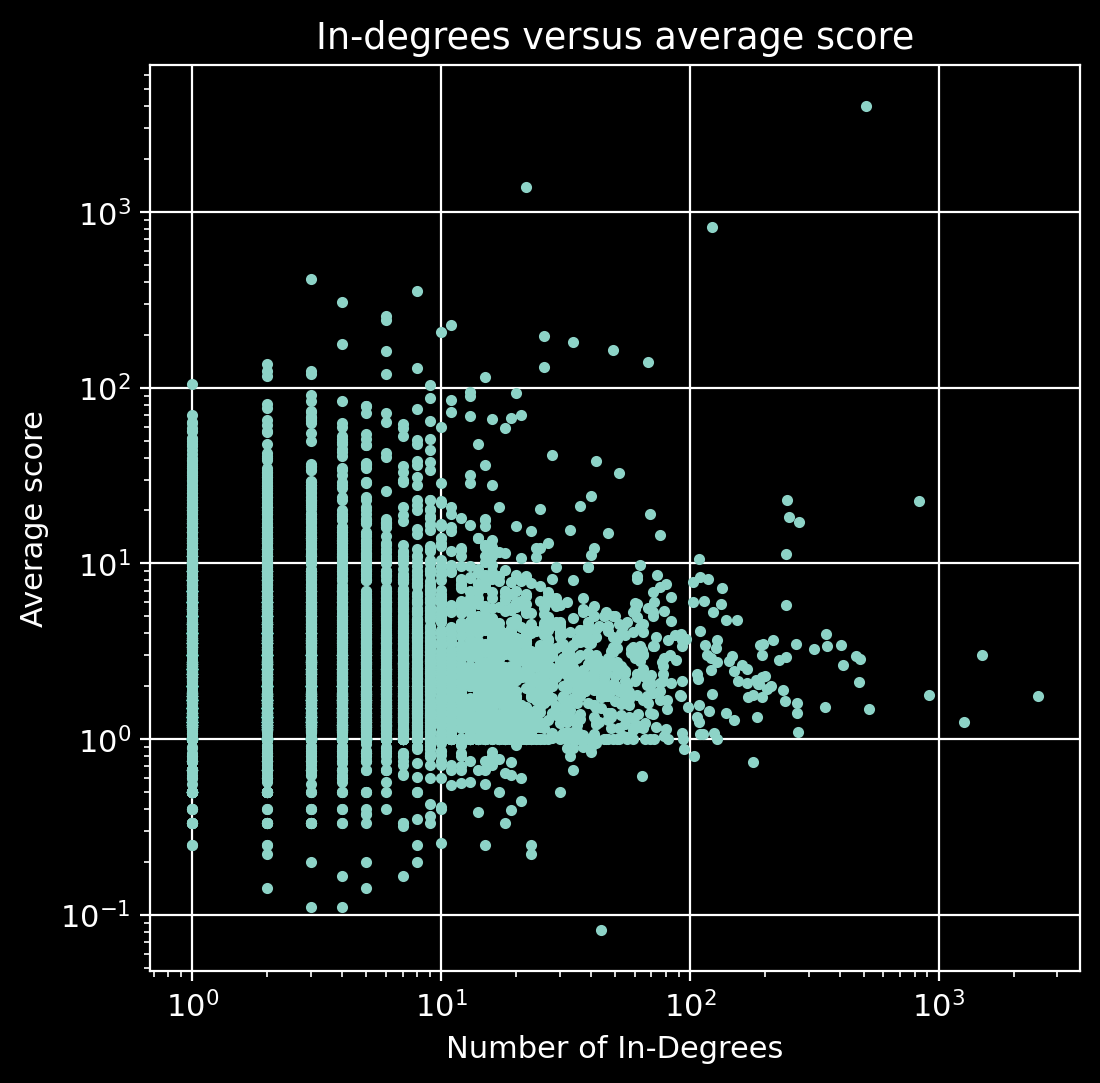

In [26]:
### Plot a scatter plot of the the in- degree versus average score for all redditors. 

avg_score = wsb_comments_filtered.groupby(['author']).mean().reset_index()
avg_score['in-degrees'] = avg_score['author'].map(wsb_in_degrees_dict)

fig, ax = plt.subplots(figsize=(6,6))
# There is an issue with scatter and logarithmic scaling, therefor a standard plot is used..
ax.plot(avg_score['in-degrees'], avg_score['score'], '.') 
# ax.scatter(avg_score['in-degrees'], avg_score['score'], c=np.log10(sizes), s=np.log10(sizes))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of In-Degrees')
ax.set_ylabel('Average score')
ax.set_title("In-degrees versus average score")
ax.grid()

### Comment on the relation between the two.
It seems that the average score trends towards the 1 to 10 area as the number of in-degrees rise, which indicates that on Reddit more exposure leads to a more moderated rating/score.